In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
# !rm -rf /content/COVID19_Pneumonia_Normal_Chest_Xray_PA # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA.git

/content
Cloning into 'COVID19_Pneumonia_Normal_Chest_Xray_PA'...
remote: Enumerating objects: 6884, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 6884 (delta 28), reused 40 (delta 10), pack-reused 6811
Receiving objects: 100% (6884/6884), 1.86 GiB | 36.33 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (7001/7001), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["COVID19_Pneumonia_Normal_Chest_Xray_PA"]

for folder in repository_folder:
    local_path = '/content/' + folder + '/dataset'
    DataSetSummary(local_path, 0)
    local_path = '/content/' + folder + '/sample'
    DataSetSummary(local_path, 0)

Tổng số thư mục: 3
-Thư mục: normal, Số tệp: 2313
-Thư mục: covid, Số tệp: 2313
-Thư mục: pneumonia, Số tệp: 2313
Tổng số thư mục: 3
-Thư mục: normal, Số tệp: 20
-Thư mục: covid, Số tệp: 20
-Thư mục: pneumonia, Số tệp: 20


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/01_CannyEdge_bilateralFilter

/content/drive/MyDrive/Colab Notebooks/Thesis/01_CannyEdge_bilateralFilter


In [7]:
# Set the path to your dataset
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'


In [8]:
import os

class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path):
    images = []
    # labels = [] # direct
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                img = Image(image_path, class_name)
                images.append(img)
                # labels.append(img.label) # direct
    # return images, labels # direct
    return images

images = load_images_from_folder(dataset_path)
# for class_name, imgs in images.items():
#     for img in imgs:
#         print(f"Path: {img.path}, Label: {img.label}")

Class normal


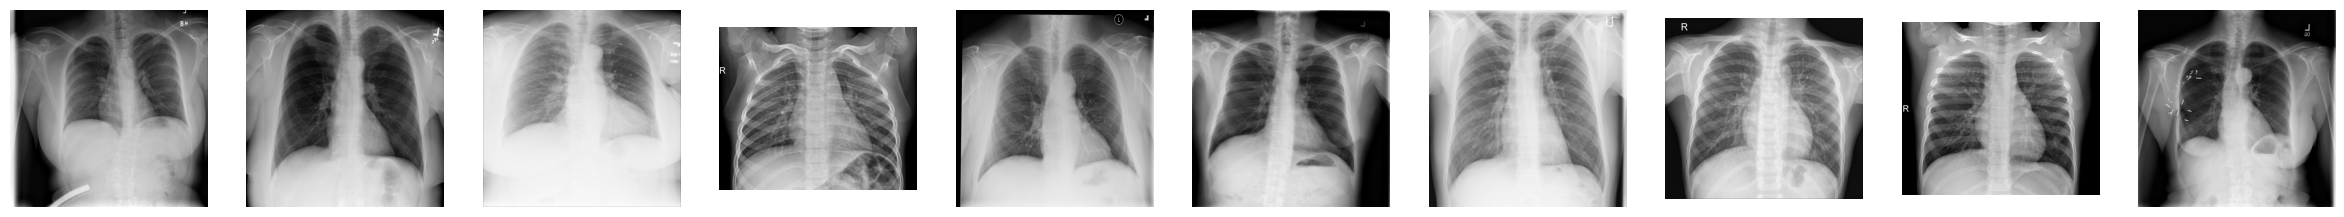

Class covid


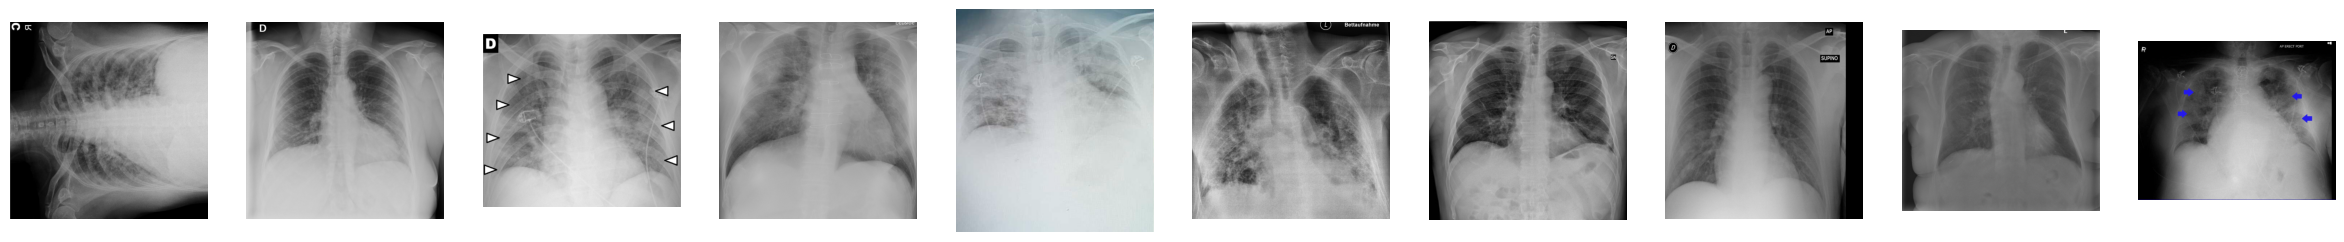

Class pneumonia


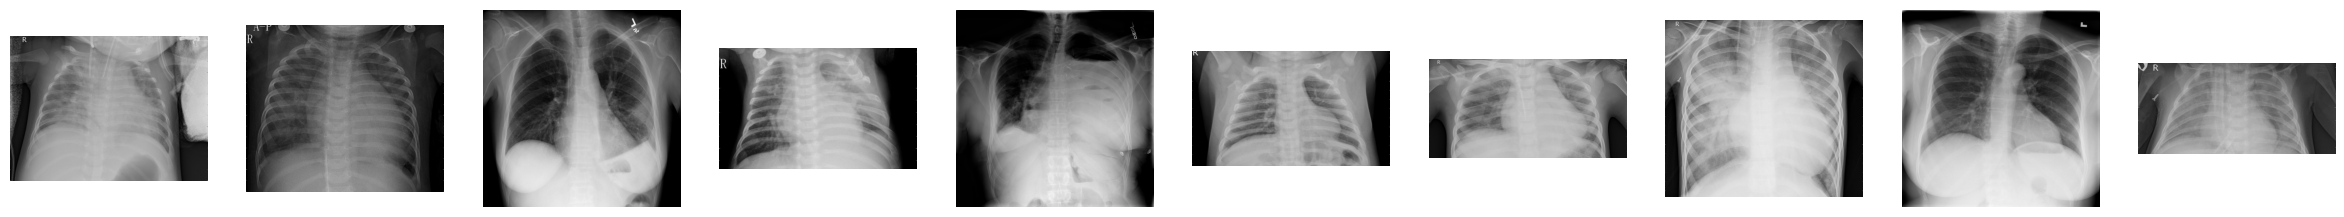

In [9]:
def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder(dataset_path)
imshow(images, 10)


In [10]:
images['normal'][0].path

'/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset/normal/00000815_000.png'

In [11]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample/pneumonia/00001182_004.png"
image_path = images['normal'][0].path
image_specifications = get_image_specifications(image_path)
print(image_specifications)

Image Format: PNG
Image Mode: L
Image Size: (1024, 1024) pixels (Width: 1024, Height: 1024)
Image Colors: [(12077, 0), (3760, 1), (3315, 2), (4228, 3), (6384, 4), (6421, 5), (8889, 6), (14429, 7), (10311, 8), (2332, 9), (2299, 10), (2169, 11), (2138, 12), (2380, 13), (2402, 14), (2444, 15), (2506, 16), (2581, 17), (2489, 18), (2076, 19), (1932, 20), (1897, 21), (1731, 22), (1801, 23), (1914, 24), (1937, 25), (1961, 26), (2029, 27), (2078, 28), (2320, 29), (2294, 30), (2387, 31), (2389, 32), (2563, 33), (2728, 34), (2649, 35), (2945, 36), (3181, 37), (3364, 38), (3240, 39), (3275, 40), (3294, 41), (3298, 42), (3463, 43), (3615, 44), (3364, 45), (3588, 46), (3717, 47), (3858, 48), (3887, 49), (4142, 50), (4231, 51), (4292, 52), (4469, 53), (4548, 54), (4714, 55), (4853, 56), (5021, 57), (5186, 58), (5141, 59), (5105, 60), (5037, 61), (4980, 62), (4795, 63), (4767, 64), (4732, 65), (4770, 66), (4898, 67), (4917, 68), (4967, 69), (4943, 70), (4988, 71), (4848, 72), (4724, 73), (4681, 74), 

## Load dataset

In [12]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

Reformatting 257.jfif to JPG format...
Reformatted 257.jfif to JPG format.
Reformatting 248.jfif to JPG format...
Reformatted 248.jfif to JPG format.
Reformatting 404.jfif to JPG format...
Reformatted 404.jfif to JPG format.
Reformatting 364.jfif to JPG format...
Reformatted 364.jfif to JPG format.
Reformatting 408.jfif to JPG format...
Reformatted 408.jfif to JPG format.
Reformatting 373.jfif to JPG format...
Reformatted 373.jfif to JPG format.
Reformatting 372.jfif to JPG format...
Reformatted 372.jfif to JPG format.
Reformatting 406.jfif to JPG format...
Reformatted 406.jfif to JPG format.
Reformatting 252.jfif to JPG format...
Reformatted 252.jfif to JPG format.
Reformatting 250.jfif to JPG format...
Reformatted 250.jfif to JPG format.
Reformatting 258.jfif to JPG format...
Reformatted 258.jfif to JPG format.
Reformatting 405.jfif to JPG format...
Reformatted 405.jfif to JPG format.
Reformatting 187.jfif to JPG format...
Reformatted 187.jfif to JPG format.
Reformatting 244.jfif to 

# CannyEdge + bilateral Filter

In [13]:
import os
import cv2
import numpy as np
import pywt
from shutil import copyfile
from scipy.ndimage.filters import median_filter
# Đường dẫn của dataset, có thể cần điều chỉnh
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/sample'

# Đường dẫn lưu trữ ảnh đã được xử lý
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/CannyEdge_bilateralFilter'

# Tạo thư mục output nếu nó chưa tồn tại
os.makedirs(output_path, exist_ok=True)

# Lấy danh sách thư mục con trong dataset
child_folders = os.listdir(dataset_path)

import cv2

def CannyEdge_bilateralFilter(image):
    #blurred = cv2.GaussianBlur(image, (0, 0), 3)
    #filtered_image = median_filter(image, 3)
    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    # Áp dụng phương pháp Canny
    edges = cv2.Canny(denoised_image, 50, 150)
    # Kết hợp ảnh gốc với các cạnh để làm sáng cạnh
    #alpha = 1.5, beta = -0.5 và gamma = 0. alpha: Hệ số trọng số của ảnh đầu vào. beta: Hệ số trọng số của ảnh đầu ra.gamma: Hệ số bù đắp.
    sharp = cv2.addWeighted(denoised_image, 1.5, edges, -0.5, 0)
    return sharp




<ipython-input-13-d52d8e75d167>:6: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter


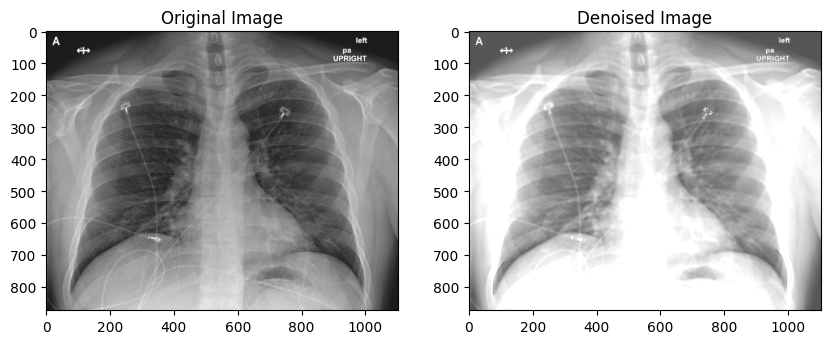

In [14]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset/covid/012.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = CannyEdge_bilateralFilter(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()


In [15]:
# Counter for denoised images
denoised_count = 0

# Xử lý từng thư mục con
for folder in child_folders:

    # Tạo thư mục output cho thư mục con hiện tại
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Lấy danh sách các tệp ảnh trong thư mục con hiện tại
    folder_path = os.path.join(dataset_path, folder)
    image_files = os.listdir(folder_path)

    # Xử lý từng tệp ảnh
    for image_file in image_files:
        # Đọc ảnh
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Áp dụng biến đổi sóng và lọc nhiễu
        denoised_image = CannyEdge_bilateralFilter(img)

        # Xuất ảnh đã xử lý ra thư mục output
        filename, extension = os.path.splitext(image_file)
        output_image_path = os.path.join(output_folder, filename + '.jpg')
        cv2.imwrite(output_image_path, denoised_image)
        # Increment the counter
        denoised_count += 1
    # Hiển thị số lượng ảnh đã được denoise
    print(f"Total images denoised: {denoised_count}")

Total images denoised: 2313
Total images denoised: 4663
Total images denoised: 6976


In [16]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/CannyEdge_bilateralFilter'

In [17]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (224,224)
batch_size=32
color_mode = 'rgb'
label_mode = "categorical"

# Load the dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the dataset
test_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names: ", class_names)
print("Number of classes: ", num_classes)

Found 6939 files belonging to 3 classes.
Using 5552 files for training.
Found 6939 files belonging to 3 classes.
Using 1387 files for validation.
Class names:  ['covid', 'normal', 'pneumonia']
Number of classes:  3


In [18]:
# Get the class names
class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names: ", class_names)
print("Number of classes: ", num_classes)

Class names:  ['covid', 'normal', 'pneumonia']
Number of classes:  3


In [19]:
# Check a few samples from the train dataset
for images, labels in train_dataset.take(1):
    print("Images shape: ", images.shape)
    print("Labels shape: ", labels.shape)
    print("Labels: ", labels)

# Check a few samples from the test dataset
for images, labels in test_dataset.take(1):
    print("Images shape: ", images.shape)
    print("Labels shape: ", labels.shape)
    print("Labels: ", labels)

Images shape:  (32, 224, 224, 3)
Labels shape:  (32, 3)
Labels:  tf.Tensor(
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]], shape=(32, 3), dtype=float32)
Images shape:  (32, 224, 224, 3)
Labels shape:  (32, 3)
Labels:  tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]], shape=(32, 3), dtype=float32)


In [20]:
import os
import tensorflow as tf
import platform
import psutil

# Get CPU information
print(f"Physical cores: {psutil.cpu_count(logical=False)}")
print(f"Total cores: {psutil.cpu_count(logical=True)}")
print(f"Max Frequency: {psutil.cpu_freq().max:.2f}Mhz")
print(f"Min Frequency: {psutil.cpu_freq().min:.2f}Mhz")
print(f"Current Frequency: {psutil.cpu_freq().current:.2f}Mhz")
print(f"CPU Usage: {psutil.cpu_percent()}%")

# Get system information
print(f"System: {platform.system()}")
print(f"Version: {platform.version()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")

# Get GPU information
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU: {gpus[0].device_type} {gpus[0].name}")
else:
    print("No GPU detected")

# Get TPU information
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
    print("Not connected to a TPU runtime")

Physical cores: 1
Total cores: 2
Max Frequency: 0.00Mhz
Min Frequency: 0.00Mhz
Current Frequency: 2000.19Mhz
CPU Usage: 79.5%
System: Linux
Version: #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
Machine: x86_64
Processor: x86_64
GPU: GPU /physical_device:GPU:0
Not connected to a TPU runtime


## MobileNetV2: GlobalAveragePooling

In [21]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Model
import os
import numpy as np
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model
mobilenetv2 = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224,224,3))

# Freeze the layers
for layer in mobilenetv2.layers:
    layer.trainable = False

# Add custom layers
pool = GlobalAveragePooling2D()(mobilenetv2.output)
dropout = Dropout(rate=0.4)(pool)
fc1 = Dense(1024, activation='relu')(dropout)
output = Dense(3, activation='softmax')(fc1)

# Create a new model
model = Model(inputs = mobilenetv2.inputs, outputs = output)

# Print the model summary
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [22]:
# Compile the model with sparse categorical crossentropy loss
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

epochs = 20 # training epochs
learning_rate =  0.001
steps_per_epoch = len(train_dataset)
decay_steps = steps_per_epoch * 5

# optimizer = keras.optimizers.Adam(learning_rate=0.01)
# Define learning rate decay
lr_schedule = ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=decay_steps,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
pip install gputil

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=2b4d103d83b6ffc68aad33bf721c476222dc0efb52d563360fabee08ce206faf
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil


In [24]:
import psutil
import GPUtil
import csv

class SystemMonitor(keras.callbacks.Callback):
    def __init__(self):
        self.cpu_usage = []
        self.ram_usage = []
        self.ram_usage_gb = []
        self.gpu_usage = []
        self.gpu_usage_gb = []

    def on_epoch_end(self, epoch, logs=None):
        cpu_percent = psutil.cpu_percent()
        ram = psutil.virtual_memory()
        ram_percent = ram.percent
        ram_gb = ram.used / (1024 ** 3)  # Convert bytes to GB
        gpu = GPUtil.getGPUs()[0]
        gpu_load = gpu.load * 100 # Convert float to %
        gpu_gb = gpu.memoryUsed / 1024  # in GB

        self.cpu_usage.append(cpu_percent)
        self.ram_usage.append(ram_percent)
        self.ram_usage_gb.append(ram_gb)
        self.gpu_usage.append(gpu_load)
        self.gpu_usage_gb.append(gpu_gb)

        # print(f"\nCPU usage: {cpu_percent}%")
        # print(f"RAM usage: {ram_percent}% ({ram_gb} GB)")
        # print(f"GPU usage: {gpu_load}% ({gpu_gb} GB)")

        # Get training metrics from logs
        train_loss = logs.get('loss')
        train_accuracy = logs.get('accuracy')
        val_loss = logs.get('val_loss')
        val_accuracy = logs.get('val_accuracy')

        with open('system_usage.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            # Write header if file is empty
            if f.tell() == 0:
                writer.writerow(['Epoch', 'CPU Usage (%)', 'RAM Usage (%)', 'RAM Usage (GB)', 'GPU Usage (%)', 'GPU Usage (GB)', 'Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy'])
            writer.writerow([epoch, cpu_percent, ram_percent, ram_gb, gpu_load, gpu_gb, train_loss, train_accuracy, val_loss, val_accuracy])

    def on_train_end(self, logs=None):
        print(f"\nMin, Max, Avg CPU usage: {min(self.cpu_usage)}%, {max(self.cpu_usage)}%, {sum(self.cpu_usage)/len(self.cpu_usage)}%")
        print(f"Min, Max, Avg RAM usage: {min(self.ram_usage)}%, {max(self.ram_usage)}%, {sum(self.ram_usage)/len(self.ram_usage)}%")
        print(f"Min, Max, Avg RAM usage in GB: {min(self.ram_usage_gb)}, {max(self.ram_usage_gb)}, {sum(self.ram_usage_gb)/len(self.ram_usage_gb)}")
        print(f"Min, Max, Avg GPU usage: {min(self.gpu_usage)}%, {max(self.gpu_usage)}%, {sum(self.gpu_usage)/len(self.gpu_usage)}%")
        print(f"Min, Max, Avg GPU usage in GB: {min(self.gpu_usage_gb)}, {max(self.gpu_usage_gb)}, {sum(self.gpu_usage_gb)/len(self.gpu_usage_gb)}")

#### Training: 1st

In [25]:

# Create a ModelCheckpoint callback for validation accuracy
checkpoint_val = ModelCheckpoint('best_model_val_acc.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Create a ModelCheckpoint callback for training accuracy
checkpoint_train = ModelCheckpoint('best_model_train_acc.h5', monitor='accuracy', verbose=1, save_best_only=True, mode='max')


# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, verbose=1)

class LearningRatePrinter(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # lr = self.model.optimizer.lr
        # if isinstance(lr, ExponentialDecay):
        #     lr = lr(self.model.optimizer.iterations)
        if isinstance(self.model.optimizer.lr, ExponentialDecay):
            lr = self.model.optimizer.lr(self.model.optimizer.iterations)
        else:
            lr = self.model.optimizer.lr
        print(f"\nLearning rate at end of epoch {epoch + 1} is {lr.numpy()}")

In [26]:

# Train the model
start_time = time.time()
history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs, callbacks=[checkpoint_val, checkpoint_train, LearningRatePrinter(), SystemMonitor(), early_stopping]) # callbacks=[early_stopping, checkpoint, LearningRatePrinter()]
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

# Get the actual number of epochs run
actual_epochs = len(history.epoch)

# Calculate and print the average run time per epoch
print(f"Average run time per epoch: {runtime/actual_epochs} seconds")

# Print the initial learning rate
print("Initial learning rate: ", lr_schedule.initial_learning_rate)

# Print the final learning rate
print("Final learning rate: ", lr_schedule(epochs * steps_per_epoch).numpy())


Epoch 1/20
174/174 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.7498
Epoch 1: val_accuracy improved from -inf to 0.76352, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: accuracy improved from -inf to 0.74982, saving model to best_model_train_acc.h5

Learning rate at end of epoch 1 is 0.0010000000474974513
174/174 [==============================] - 88s 429ms/step - loss: 0.6687 - accuracy: 0.7498 - val_loss: 0.6728 - val_accuracy: 0.7635
Epoch 2/20
173/174 [============================>.] - ETA: 0s - loss: 0.4836 - accuracy: 0.8103
Epoch 2: val_accuracy improved from 0.76352 to 0.87888, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.74982 to 0.81034, saving model to best_model_train_acc.h5

Learning rate at end of epoch 2 is 0.0010000000474974513
174/174 [==============================] - 51s 277ms/step - loss: 0.4836 - accuracy: 0.8103 - val_loss: 0.3668 - val_accuracy: 0.8789
Epoch 3/20
174/174 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.8375
Epoch 3: val_accuracy did not improve from 0.87888

Epoch 3: accuracy improved from 0.81034 to 0.83754, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 3 is 0.0010000000474974513
174/174 [==============================] - 50s 276ms/step - loss: 0.4337 - accuracy: 0.8375 - val_loss: 0.4758 - val_accuracy: 0.8363
Epoch 4/20
173/174 [============================>.] - ETA: 0s - loss: 0.3925 - accuracy: 0.8577
Epoch 4: val_accuracy improved from 0.87888 to 0.88392, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: accuracy improved from 0.83754 to 0.85789, saving model to best_model_train_acc.h5

Learning rate at end of epoch 4 is 0.0010000000474974513
174/174 [==============================] - 50s 277ms/step - loss: 0.3921 - accuracy: 0.8579 - val_loss: 0.3551 - val_accuracy: 0.8839
Epoch 5/20
173/174 [============================>.] - ETA: 0s - loss: 0.3660 - accuracy: 0.8636
Epoch 5: val_accuracy did not improve from 0.88392

Epoch 5: accuracy improved from 0.85789 to 0.86365, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 5 is 0.0010000000474974513
174/174 [==============================] - 49s 274ms/step - loss: 0.3661 - accuracy: 0.8637 - val_loss: 0.3370 - val_accuracy: 0.8839
Epoch 6/20
173/174 [============================>.] - ETA: 0s - loss: 0.3502 - accuracy: 0.8746
Epoch 6: val_accuracy improved from 0.88392 to 0.91132, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: accuracy improved from 0.86365 to 0.87464, saving model to best_model_train_acc.h5

Learning rate at end of epoch 6 is 0.0009000000427477062
174/174 [==============================] - 51s 282ms/step - loss: 0.3500 - accuracy: 0.8746 - val_loss: 0.2783 - val_accuracy: 0.9113
Epoch 7/20
173/174 [============================>.] - ETA: 0s - loss: 0.3286 - accuracy: 0.8792
Epoch 7: val_accuracy did not improve from 0.91132

Epoch 7: accuracy improved from 0.87464 to 0.87950, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 7 is 0.0009000000427477062
174/174 [==============================] - 50s 281ms/step - loss: 0.3278 - accuracy: 0.8795 - val_loss: 0.2820 - val_accuracy: 0.8998
Epoch 8/20
173/174 [============================>.] - ETA: 0s - loss: 0.3079 - accuracy: 0.8896
Epoch 8: val_accuracy did not improve from 0.91132

Epoch 8: accuracy improved from 0.87950 to 0.88887, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 8 is 0.0009000000427477062
174/174 [==============================] - 49s 271ms/step - loss: 0.3089 - accuracy: 0.8889 - val_loss: 0.2864 - val_accuracy: 0.9099
Epoch 9/20
174/174 [==============================] - ETA: 0s - loss: 0.2955 - accuracy: 0.8948
Epoch 9: val_accuracy did not improve from 0.91132

Epoch 9: accuracy improved from 0.88887 to 0.89481, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 9 is 0.0009000000427477062
174/174 [==============================] - 49s 275ms/step - loss: 0.2955 - accuracy: 0.8948 - val_loss: 0.3139 - val_accuracy: 0.8882
Epoch 10/20
174/174 [==============================] - ETA: 0s - loss: 0.3045 - accuracy: 0.8903
Epoch 10: val_accuracy did not improve from 0.91132

Epoch 10: accuracy did not improve from 0.89481

Learning rate at end of epoch 10 is 0.0009000000427477062
174/174 [==============================] - 48s 267ms/step - loss: 0.3045 - accuracy: 0.8903 - val_loss: 0.2867 - val_accuracy: 0.9063
Epoch 11/20
174/174 [==============================] - ETA: 0s - loss: 0.2765 - accuracy: 0.9015
Epoch 11: val_accuracy improved from 0.91132 to 0.91997, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 11: accuracy improved from 0.89481 to 0.90148, saving model to best_model_train_acc.h5

Learning rate at end of epoch 11 is 0.0008099999977275729
174/174 [==============================] - 49s 275ms/step - loss: 0.2765 - accuracy: 0.9015 - val_loss: 0.2332 - val_accuracy: 0.9200
Epoch 12/20
174/174 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.9056
Epoch 12: val_accuracy improved from 0.91997 to 0.92141, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 12: accuracy improved from 0.90148 to 0.90562, saving model to best_model_train_acc.h5

Learning rate at end of epoch 12 is 0.0008099999977275729
174/174 [==============================] - 50s 274ms/step - loss: 0.2623 - accuracy: 0.9056 - val_loss: 0.2368 - val_accuracy: 0.9214
Epoch 13/20
174/174 [==============================] - ETA: 0s - loss: 0.2472 - accuracy: 0.9107
Epoch 13: val_accuracy did not improve from 0.92141

Epoch 13: accuracy improved from 0.90562 to 0.91066, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 13 is 0.0008099999977275729
174/174 [==============================] - 49s 275ms/step - loss: 0.2472 - accuracy: 0.9107 - val_loss: 0.2414 - val_accuracy: 0.9156
Epoch 14/20
173/174 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9104
Epoch 14: val_accuracy improved from 0.92141 to 0.92358, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 14: accuracy did not improve from 0.91066

Learning rate at end of epoch 14 is 0.0008099999977275729
174/174 [==============================] - 48s 266ms/step - loss: 0.2440 - accuracy: 0.9103 - val_loss: 0.2289 - val_accuracy: 0.9236
Epoch 15/20
173/174 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9182
Epoch 15: val_accuracy improved from 0.92358 to 0.92430, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 15: accuracy improved from 0.91066 to 0.91823, saving model to best_model_train_acc.h5

Learning rate at end of epoch 15 is 0.0008099999977275729
174/174 [==============================] - 50s 277ms/step - loss: 0.2391 - accuracy: 0.9182 - val_loss: 0.2444 - val_accuracy: 0.9243
Epoch 16/20
173/174 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.9104
Epoch 16: val_accuracy improved from 0.92430 to 0.92502, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 16: accuracy did not improve from 0.91823

Learning rate at end of epoch 16 is 0.0007289999630302191
174/174 [==============================] - 49s 274ms/step - loss: 0.2489 - accuracy: 0.9103 - val_loss: 0.2307 - val_accuracy: 0.9250
Epoch 17/20
174/174 [==============================] - ETA: 0s - loss: 0.2189 - accuracy: 0.9193
Epoch 17: val_accuracy did not improve from 0.92502

Epoch 17: accuracy improved from 0.91823 to 0.91931, saving model to best_model_train_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Learning rate at end of epoch 17 is 0.0007289999630302191
174/174 [==============================] - 48s 268ms/step - loss: 0.2189 - accuracy: 0.9193 - val_loss: 0.2274 - val_accuracy: 0.9236
Epoch 18/20
174/174 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9218
Epoch 18: val_accuracy improved from 0.92502 to 0.92790, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 18: accuracy improved from 0.91931 to 0.92183, saving model to best_model_train_acc.h5

Learning rate at end of epoch 18 is 0.0007289999630302191
174/174 [==============================] - 51s 280ms/step - loss: 0.2136 - accuracy: 0.9218 - val_loss: 0.2172 - val_accuracy: 0.9279
Epoch 19/20
174/174 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9278
Epoch 19: val_accuracy improved from 0.92790 to 0.93151, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 19: accuracy improved from 0.92183 to 0.92777, saving model to best_model_train_acc.h5

Learning rate at end of epoch 19 is 0.0007289999630302191
174/174 [==============================] - 51s 286ms/step - loss: 0.2101 - accuracy: 0.9278 - val_loss: 0.2154 - val_accuracy: 0.9315
Epoch 20/20
174/174 [==============================] - ETA: 0s - loss: 0.2080 - accuracy: 0.9265
Epoch 20: val_accuracy improved from 0.93151 to 0.93583, saving model to best_model_val_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 20: accuracy did not improve from 0.92777

Learning rate at end of epoch 20 is 0.0007289999630302191
174/174 [==============================] - 51s 282ms/step - loss: 0.2080 - accuracy: 0.9265 - val_loss: 0.2086 - val_accuracy: 0.9358

Min, Max, Avg CPU usage: 48.8%, 92.6%, 78.075%
Min, Max, Avg RAM usage: 27.2%, 32.9%, 30.334999999999997%
Min, Max, Avg RAM usage in GB: 3.0888519287109375, 3.815631866455078, 3.4882061004638674
Min, Max, Avg GPU usage: 0.0%, 68.0%, 4.1%
Min, Max, Avg GPU usage in GB: 2.1201171875, 2.1201171875, 2.1201171875
Runtime: 1317.6355330944061 seconds
Average run time per epoch: 65.88177665472031 seconds
Initial learning rate:  0.001
Final learning rate:  0.00065609993


#### Training: 2nd

In [27]:

# # # Load the model's weights from last run via #Recover
# # model.load_weights('Copy of best_model_train_acc.h5')
# # Set the ModelCheckpoint's best attribute to the best train & validation accuracy from last run via #Recover
# checkpoint_train.best = max(history_dict['accuracy'])
# checkpoint_val.best = max(history_dict['val_accuracy'])

# # Train the model
# start_time = time.time()
# history = model.fit(train_dataset, validation_data=test_dataset, epochs=(100-85), callbacks=[checkpoint_val, checkpoint_train, LearningRatePrinter(), SystemMonitor(), early_stopping]) # callbacks=[early_stopping, checkpoint, LearningRatePrinter()]
# end_time = time.time()

# # Calculate runtime
# runtime = end_time - start_time
# print("Runtime:", runtime, "seconds")

# # Get the actual number of epochs run
# actual_epochs = len(history.epoch)

# # Calculate and print the average run time per epoch
# print(f"Average run time per epoch: {runtime/actual_epochs} seconds")


#### Training: 3rd

In [28]:

# # # Create a ModelCheckpoint callback
# # checkpoint = ModelCheckpoint('best_model_VGG16.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# # Create a ModelCheckpoint callback for validation accuracy
# checkpoint_val = ModelCheckpoint('best_model_val_acc.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# # Create a ModelCheckpoint callback for training accuracy
# checkpoint_train = ModelCheckpoint('best_model_train_acc.h5', monitor='accuracy', verbose=1, save_best_only=True, mode='max')


# # Define early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, verbose=1)

# class LearningRatePrinter(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         # lr = self.model.optimizer.lr
#         # if isinstance(lr, ExponentialDecay):
#         #     lr = lr(self.model.optimizer.iterations)
#         if isinstance(self.model.optimizer.lr, ExponentialDecay):
#             lr = self.model.optimizer.lr(self.model.optimizer.iterations)
#         else:
#             lr = self.model.optimizer.lr
#         print(f"\nLearning rate at end of epoch {epoch} is {lr.numpy()}")

# # # Add the custom callback to the list of callbacks
# # callbacks = [checkpoint, LearningRatePrinter()]

# # Train the model
# start_time = time.time()
# history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs, callbacks=[checkpoint_val, checkpoint_train, LearningRatePrinter(), SystemMonitor(), early_stopping]) # callbacks=[early_stopping, checkpoint, LearningRatePrinter()]
# end_time = time.time()

# # Calculate runtime
# runtime = end_time - start_time
# print("Runtime:", runtime, "seconds")
# print(f"Average run time {runtime/epochs} seconds")


# # Print the initial learning rate
# print("Initial learning rate: ", lr_schedule.initial_learning_rate)

# # Print the final learning rate
# print("Final learning rate: ", lr_schedule(epochs * steps_per_epoch).numpy())


#### Accuracy & Loss

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
# # Initialize a dictionary to store the history
history_dict = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

# from pickle import load
# input = open('history_dict.pkl', 'rb')
# history_dict = load(input)
# input.close()

# Append the history data to the dictionary
history_dict['loss'].extend(history.history['loss'])
history_dict['accuracy'].extend(history.history['accuracy'])
history_dict['val_loss'].extend(history.history['val_loss'])
history_dict['val_accuracy'].extend(history.history['val_accuracy'])

from pickle import dump
output = open('history_dict.pkl', 'wb')
dump(history_dict, output)
output.close()

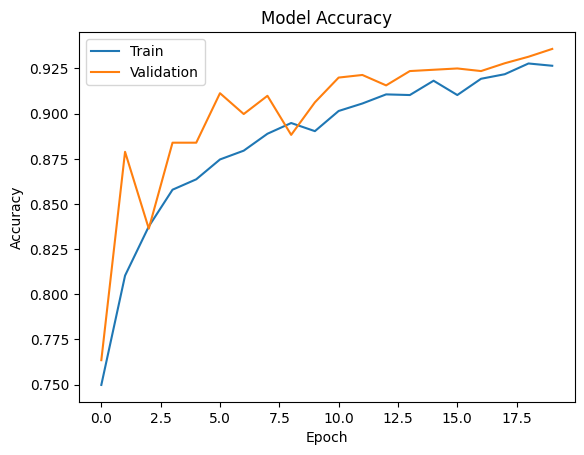

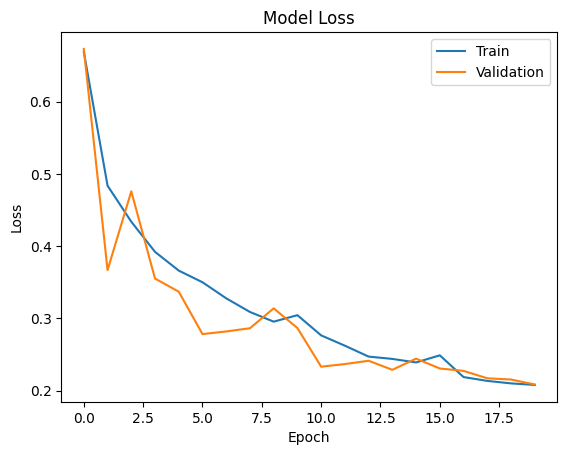

In [31]:
import matplotlib.pyplot as plt

# # Plot the accuracy curve
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# # Plot the loss curve
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
# from pickle import load
# input = open('history_VGG16.pkl', 'rb')
# history = load(input)
# input.close()

from tensorflow.keras.models import load_model

# Load the saved best model
model = load_model('best_model_val_acc.h5')

In [33]:
from sklearn.metrics import precision_recall_fscore_support

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

# Evaluate the model on the test set
y_true = []
y_pred = []
y_pred_proba = [] # AUC calculation

for img, label in test_dataset:
    # prediction = model.predict(img)
    # y_true.extend(tf.argmax(label, axis=1).numpy())
    # y_pred.extend(tf.argmax(prediction, axis=1).numpy())
    prediction = model.predict(img)
    y_pred_proba += prediction.tolist()
    y_pred += np.argmax(prediction, axis=-1).tolist()
    y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()


# Calculate precision, recall, and F1 score in macro average
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

# Print the metrics
print("Loss:", test_loss)
print("Accuracy:", test_accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1 score (macro):", f1_score)


1/1 [==============================] - 1s 1s/step
Loss: 0.2086087316274643
Accuracy: 0.9358327388763428
Precision (macro): 0.9399487841252602
Recall (macro): 0.9364395056968547
F1 score (macro): 0.936814411480332


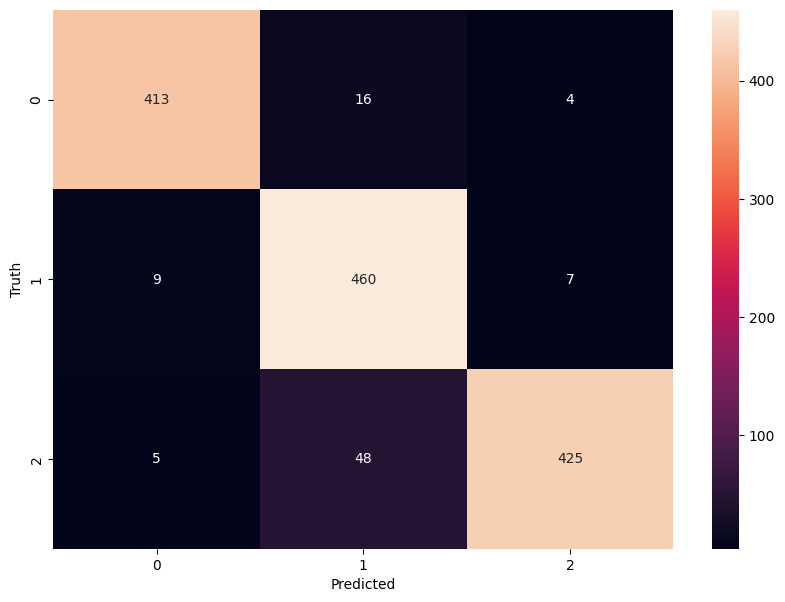

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Draw the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_true, y_pred) * 100

93.5832732516222

In [36]:
model.evaluate(test_dataset)

44/44 [==============================] - 10s 164ms/step - loss: 0.2086 - accuracy: 0.9358


[0.2086087316274643, 0.9358327388763428]

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels
y_true_binary = label_binarize(y_true, classes=[i for i in range(num_classes)])
y_pred_proba_binary = np.array(y_pred_proba)

# Calculate AUC for each class
aucs = []
for i in range(num_classes):
    auc = roc_auc_score(y_true_binary[:, i], y_pred_proba_binary[:, i])
    aucs.append(auc)
    print(f"AUC for class {i}: {auc}")

# Calculate and print average AUC
average_auc = np.mean(aucs)
print("Average AUC:", average_auc)

AUC for class 0: 0.9955844118116984
AUC for class 1: 0.9773427482958057
AUC for class 2: 0.9755260044832936
Average AUC: 0.9828177215302659


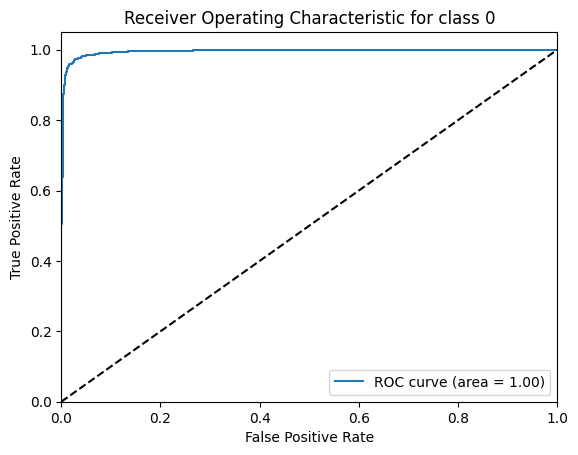

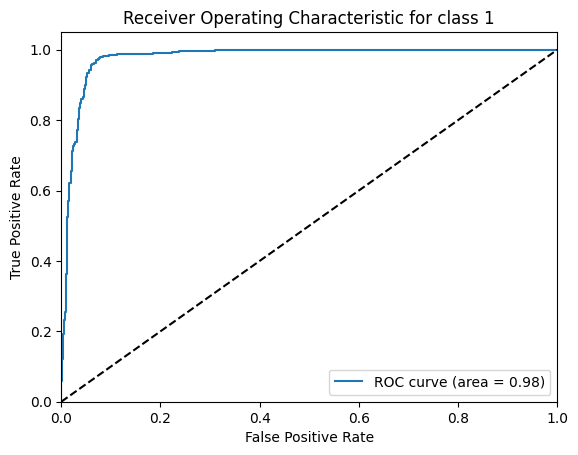

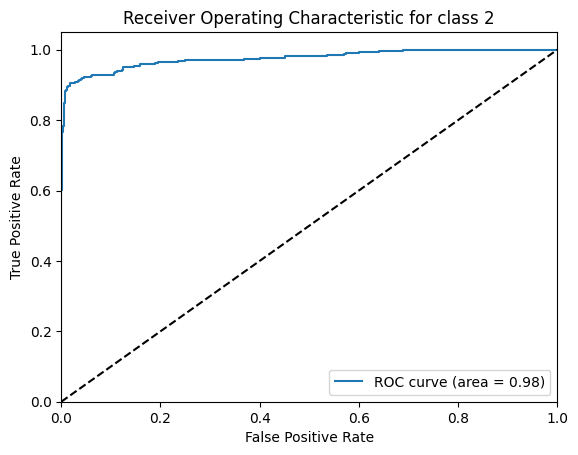

In [38]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_proba_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class %d' % i)
    plt.legend(loc="lower right")
    plt.show()